Mathematical Representation
A simple linear regression model follows the equation:



y=wx+b
Where:

𝑥
x = input features (independent variable)

𝑤
w = weight (slope)

𝑏
b = bias (intercept)

𝑦
y = predicted output (dependent variable)

Our goal is to find the optimal values of
𝑤
w and
𝑏
b to minimize the Mean Squared Error (MSE) loss:

Loss
=
1
𝑁
∑
(
𝑦
true
−
𝑦
predicted
)
2
Loss=
N
1
​
 ∑(y
true
​
 −y
predicted
​
 )
2

PyTorch’s autograd system will automatically compute gradients for optimization.



Step-by-Step Implementation in PyTorch


Step 1: Import Required Libraries



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.linspace(0, 10, 100):

torch.linspace(start, end, steps) generates a tensor with 100 values evenly

spaced between 0 and 10.

The result is a 1D tensor with shape (100,), meaning it is a vector with 100 elements.



Generate Sample Dataset

Y=2*x+3

In [ ]:
torch.manual_seed(42)
# Car prices (in $1000s)
X=torch.linspace(0,10,100).reshape(-1,1)
y=2*X+3 +torch.randn(X.size())*2


Step 3: Define Linear Regression Model



In [ ]:
class  CarSalesModel(nn.Module):
   def __init__(self) -> None:
      super(CarSalesModel,self).__init__()
      self.linear=nn.Linear(1,1)
   def forward(self,x):
       return self.linear(x)


Step 4: Initialize Model, Loss Function, and Optimizer



In [ ]:
model=CarSalesModel()

criterion=nn.MSELoss()


optimizer=optim.SGD(model.parameters(),lr=0.0005)

Step 5: Train the Model



In [ ]:
# Training loop
epochs = 500  # More epochs for better convergence
for epoch in range(epochs):
    # Forward pass: Predict sales
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, y)

    # Backward pass: Compute gradients
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute new gradients
    optimizer.step()  # Update weights

    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [50/500], Loss: 13.8045
Epoch [100/500], Loss: 7.3595
Epoch [150/500], Loss: 7.0835
Epoch [200/500], Loss: 6.9985
Epoch [250/500], Loss: 6.9211
Epoch [300/500], Loss: 6.8459
Epoch [350/500], Loss: 6.7725
Epoch [400/500], Loss: 6.7008
Epoch [450/500], Loss: 6.6310
Epoch [500/500], Loss: 6.5628


Step 6: Plot the Results


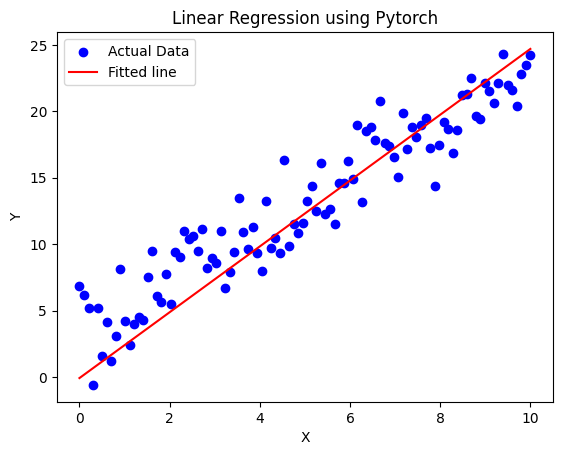

In [ ]:
with torch.no_grad():
  y_pred=model(X)
plt.scatter(X.numpy(),y.numpy(),label="Actual Data",color='blue')
plt.plot(X.numpy(),y_pred.numpy(),color='red',label='Fitted line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using Pytorch")
plt.show()

Understanding the Results

The model learns the inverse relationship between price and sales.

The regression line should show fewer sales at higher prices.

The loss should decrease over epochs, showing the model is learning.